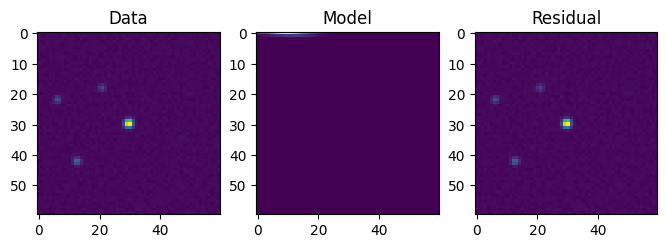

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astropy.io import fits

# Load the data and find center of PSF
image = fits.getdata('Rommulus_lens.fits')
cents = np.where(image == np.max(image))
xc = int(cents[1])
yc = int(cents[0])

# Cut out smaller box around PSF
bb = 30
box = image[yc-bb:yc+bb,xc-bb:xc+bb]
yp, xp = box.shape

# Generate grid of same size like box to put the fit on
y, x, = np.mgrid[:yp, :xp]
# Declare what function you want to fit to your data
f_init = models.Gaussian2D()
# Declare what fitting function you want to use
fit_f = fitting.LevMarLSQFitter()

# Fit the model to your data (box)
f = fit_f(f_init, x, y, box)

# Plot the data with the best-fit model
plt.figure(figsize=(8, 6))
plt.subplot(1, 3, 1)
plt.imshow(box)
plt.title("Data")
plt.subplot(1, 3, 2)
plt.imshow(f(x, y))
plt.title("Model")
plt.subplot(1, 3, 3)
plt.imshow(box - f(x, y))
plt.title("Residual")
plt.show()